### Logistic Regression  Loss Functions: Squared Error and Binary Cross Entropy
Formulas from https://github.com/schneider128k/machine_learning_course/blob/master/slides/logistic_regression.pdf

In [1]:
import numpy as np
import pandas as pd

### Downloading Datasets

In [2]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


In [3]:
train_images_original.shape

(60000, 28, 28)

In [4]:
m_train = train_images_original.shape[0]
m_test = test_images_original.shape[0]
features = train_images_original.shape[1] * train_images_original.shape[2]

#### Flattening Image 

In [5]:
def flatten(m, features, images):
    flattened_images = images.reshape((m, features))
    flattened_images = flattened_images.astype('float32') /255
    return flattened_images

train_images = flatten(m_train,features,train_images_original)
test_images  = flatten(m_test,features,test_images_original)
#Bias
train_images[:,0]= 1
test_images[:,0] = 1
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [6]:
features

784

<function matplotlib.pyplot.show(*args, **kw)>

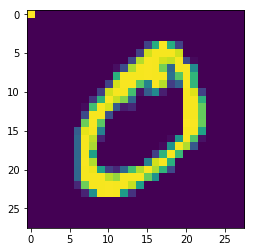

In [32]:
import matplotlib.pyplot as plt
plt.imshow(train_images[:][1].reshape(28,28))
plt.show

#### One hot encoding

In [8]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [9]:
train_labels.shape

(60000, 10)

In [10]:
train_labels[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
    
x = np.linspace(-20,20,100) 
y = sigmoid(x)

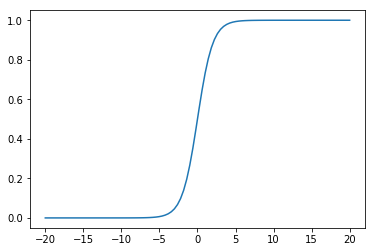

In [12]:
plt.plot(x,y)

In [13]:
def generateWeights(n):
    return np.zeros(n)

def generateRandomVector(n):
    return np.random.rand(n)

In [14]:
generateWeights(784).shape, generateRandomVector(784).shape

((784,), (784,))

### Predict
$$
\hat{y} = a\left( \sum_{j=1}^n w_j x_j + b \right)
$$

In [15]:
def predict(X, w):
    a = forwardSigmoid2(X, w)
    return a

In [16]:
def combinedPredictions(weights, images):
    activations = {}
    
    for i in range(0,10):
        activations[i] = predict(images, weights[i])
               
    return activations

In [17]:
def score(predicted_labels, labels):
    score = (predicted_labels.values == labels).sum()
    return score

#### Forward Propagation
$$
x \quad \mapsto \quad z = w^Tx = \sum_{j=1}^n w_j x_j \quad \mapsto \quad a = a(z).
$$

In [18]:
def forwardSigmoid(X, w):
    m = X.shape[0]
    n = X.shape[1]
    a = np.zeros(m).astype("float")

    for i in range(0,m):
        xi = X[i].reshape(n,1)
        wi = w.reshape(n,1)
        z = np.dot(wi.T,xi)
        a[i] = sigmoid(z)
    
    return a

In [19]:
def forwardSigmoid2(X, w):
    m = X.shape[0]
    z = np.dot(w.T,X.T)
    a = sigmoid(z)
    
    return a.reshape(m,)

#### Gradient Squared Error

\begin{equation}
\mathcal{L}_\mathrm{se} = \frac{1}{2} (a - y)^2
\end{equation}

\begin{equation}
{\partial \mathcal{L}_\mathrm{se} \over \partial w_j} = (a - y) \cdot \sigma'(z) \cdot x_j 
\end{equation}

 

In [20]:
def backwardSquaredError(X,A, Y):
    m = X.shape[0]
    n = X.shape[1]
    
    dw = np.zeros(n)
    
    for i in range(0,m):
        a = A[i]
        y = Y[i]
        
        dw += (a-y)*(a-np.power(a,2))*X[i]
    
    dw = dw/m
    
    return dw

In [21]:
def backwardSquaredError2(X,A, Y):
    m = X.shape[0]
    n = X.shape[1]
    
    dw = np.dot((A-Y)*(A-np.power(A,2)),X)
    
    dw = dw/m
    
    return dw

Gradient Binary Cross Entropy
\begin{equation}
\mathcal{L}_\mathrm{ce} = - y \log a - (1-y) \log(1-a)\,
\end{equation}

\begin{equation}
{\partial \mathcal{L}_\mathrm{ce} \over \partial w_j} = (a - y) \cdot x_j 
\end{equation}

In [22]:
def backwardCrossEntropy(X,A,Y):
    m = X.shape[0]
    n = X.shape[1]
    
    dw = np.zeros(n)
    
    for i in range(0,m):
        a = A[i]
        y = Y[i]
        dz = a - y
        dw += X[i] * dz
    
    dw = dw/m
    
    return dw


In [23]:
def backwardCrossEntropy2(X,A, Y):
    m = X.shape[0]
    n = X.shape[1]
    #dw = np.zeros(n)
    dz = A.reshape(m,) - Y.reshape(m,)

    dw = np.dot(dz.T, X)
    
    dw = dw/m
    
    return dw


In [24]:
def train(epochs, lr, train_images, train_labels):
    m = train_images.shape[0]
    n = train_images.shape[1]
    weights = {}
    for i in range(0,10):
        weight = generateWeights(n)
        weights[i] = weight
        
    for i in range(0,10):
        for epoch in range(epochs):
            a = forwardSigmoid2(train_images, weights[i])
            dw = backwardSquaredErrorLoss(train_images,a,train_labels[:,i])
            
            weights[i] = weights[i] - lr * dw
            
    return weights

In [25]:
def train_mini_batch(epochs, lr, batch_size, train_images, train_labels, forward,backward):
    n = train_images.shape[1]
    m = train_images.shape[0]
    weights = {}
    
    for i in range(0,10):
        weight = generateWeights(n)
        weights[i] = weight

        
    for i in range(0,10):
        print("Training Classifier {}".format(i))
        print("Finished Epoch ", end='')
        for epoch in range(epochs):
            shuffled_indices = np.random.permutation(m)
            train_images_shuffled = train_images[shuffled_indices]
            train_labels_shuffled = train_labels[shuffled_indices]
            for e in range(0,m,batch_size):    
                xi = train_images_shuffled[e:e+batch_size]
                yi = train_labels_shuffled[e:e+batch_size]

                a = forward(xi, weights[i])
                dw = backward(xi,a,yi[:,i])

                weights[i] = weights[i] - lr * dw
            print("{} ".format(epoch), end='')
        print()  
    return weights

### Logistic Regression with Square Error Loss

In [26]:
%%time
epochs = 5
lr = .5
batch_size = 1000
weights = train_mini_batch(epochs, lr, batch_size, train_images, train_labels, forwardSigmoid2,backwardSquaredError2)

Training Classifier 0
Finished Epoch 0 1 2 3 4 
Training Classifier 1
Finished Epoch 0 1 2 3 4 
Training Classifier 2
Finished Epoch 0 1 2 3 4 
Training Classifier 3
Finished Epoch 0 1 2 3 4 
Training Classifier 4
Finished Epoch 0 1 2 3 4 
Training Classifier 5
Finished Epoch 0 1 2 3 4 
Training Classifier 6
Finished Epoch 0 1 2 3 4 
Training Classifier 7
Finished Epoch 0 1 2 3 4 
Training Classifier 8
Finished Epoch 0 1 2 3 4 
Training Classifier 9
Finished Epoch 0 1 2 3 4 
CPU times: user 17.8 s, sys: 20.9 s, total: 38.7 s
Wall time: 12.6 s


In [27]:
activations = combinedPredictions(weights, test_images)
pred_labels = pd.DataFrame(activations).T.idxmax()
scores = score(pred_labels, test_labels_original)
print("Test Score {}/{} : Accuracy {}%".format(scores, m_test, 100*scores/m_test))

Test Score 8830/10000 : Accuracy 88.3%


In [28]:
activations = combinedPredictions(weights, train_images)
pred_labels = pd.DataFrame(activations).T.idxmax()
scores = score(pred_labels, train_labels_original)
print("Train Score {}/{} : Accuracy {}%".format(scores, m_train, 100*scores/m_train))

Train Score 52438/60000 : Accuracy 87.39666666666666%


### Logistic Regression with Binary Cross Entropy


In [29]:
%%time
epochs = 5
lr = .5
batch_size = 1000
weights = train_mini_batch(epochs, lr, batch_size, train_images, train_labels, forwardSigmoid2,backwardCrossEntropy2)

Training Classifier 0
Finished Epoch 0 1 2 3 4 
Training Classifier 1
Finished Epoch 0 1 2 3 4 
Training Classifier 2
Finished Epoch 0 1 2 3 4 
Training Classifier 3
Finished Epoch 0 1 2 3 4 
Training Classifier 4
Finished Epoch 0 1 2 3 4 
Training Classifier 5
Finished Epoch 0 1 2 3 4 
Training Classifier 6
Finished Epoch 0 1 2 3 4 
Training Classifier 7
Finished Epoch 0 1 2 3 4 
Training Classifier 8
Finished Epoch 0 1 2 3 4 
Training Classifier 9
Finished Epoch 0 1 2 3 4 
CPU times: user 17 s, sys: 19.1 s, total: 36.1 s
Wall time: 10.8 s


In [30]:
activations = combinedPredictions(weights, test_images)
pred_labels = pd.DataFrame(activations).T.idxmax()
scores = score(pred_labels, test_labels_original)
print("Test Score {}/{} : Accuracy {}%".format(scores, m_test, 100*scores/m_test))

Test Score 9053/10000 : Accuracy 90.53%


In [31]:
activations = combinedPredictions(weights, train_images)
pred_labels = pd.DataFrame(activations).T.idxmax()
scores = score(pred_labels, train_labels_original)
print("Train Score {}/{} : Accuracy {}%".format(scores, m_train, 100*scores/m_train))

Train Score 53921/60000 : Accuracy 89.86833333333334%
